In [1]:
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error, mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.shape


(500, 9)

## Preprocessing

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicates)


Duplicate Rows:
0


In [8]:
# Summary statistics
summary = df.describe()
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000   

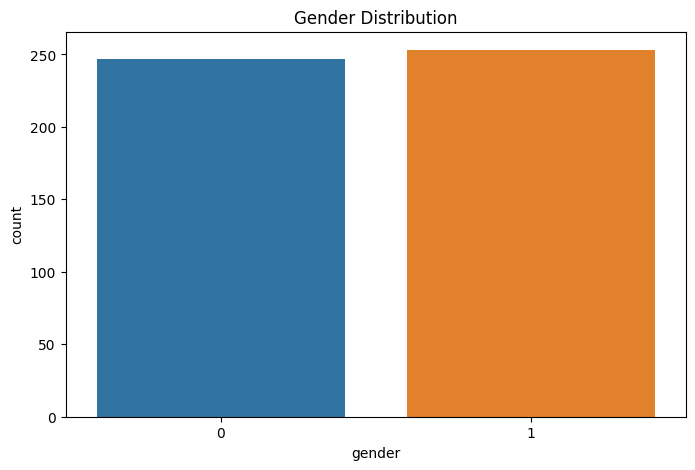

In [9]:
# Gender distribution
plt.figure(figsize=(8, 5))
clr = ["#1f77b4", "#ff7f0e"]  
sns.countplot(x="gender", data=df,palette=clr)
plt.title("Gender Distribution")
plt.show()

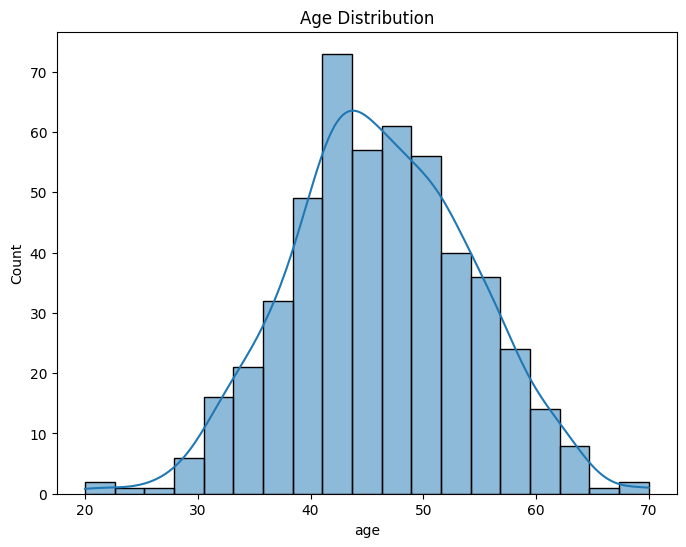

In [10]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

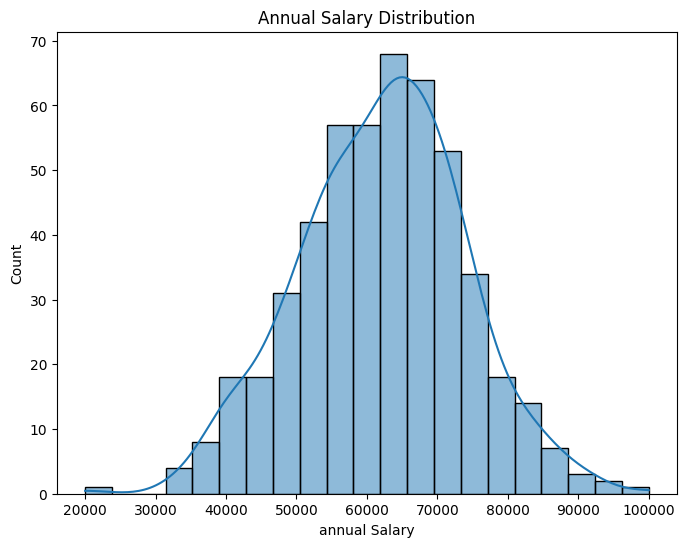

In [11]:
# Annual Salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["annual Salary"], kde=True)
plt.title("Annual Salary Distribution")
plt.show()

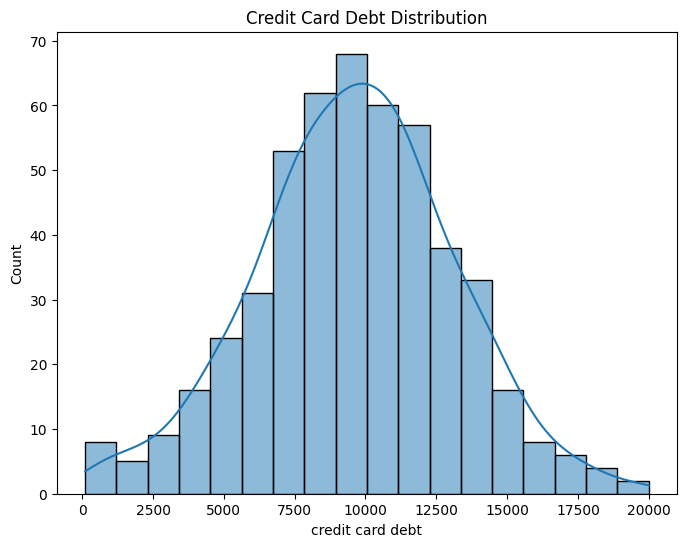

In [12]:
# Credit Card Debt distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["credit card debt"], kde=True)
plt.title("Credit Card Debt Distribution")
plt.show()

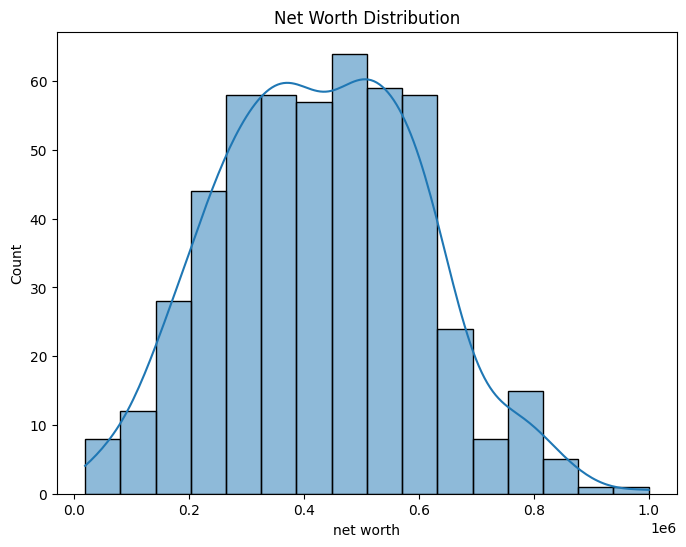

In [13]:
# Net Worth distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["net worth"], kde=True)
plt.title("Net Worth Distribution")
plt.show()

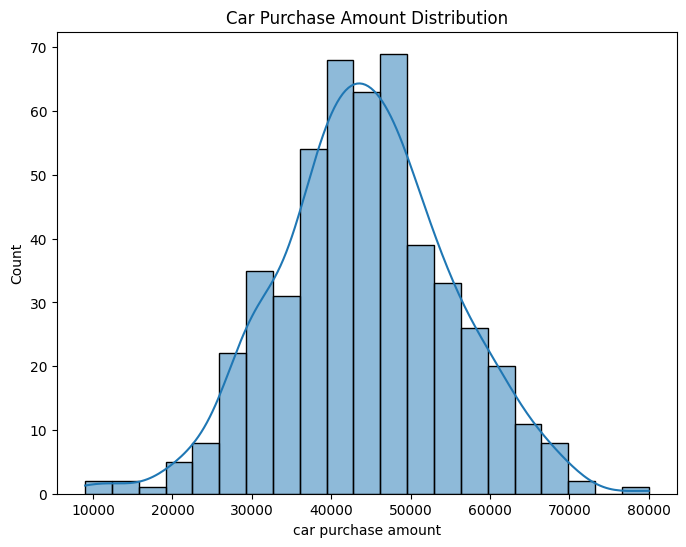

In [14]:
# Car Purchase Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["car purchase amount"], kde=True)
plt.title("Car Purchase Amount Distribution")
plt.show()

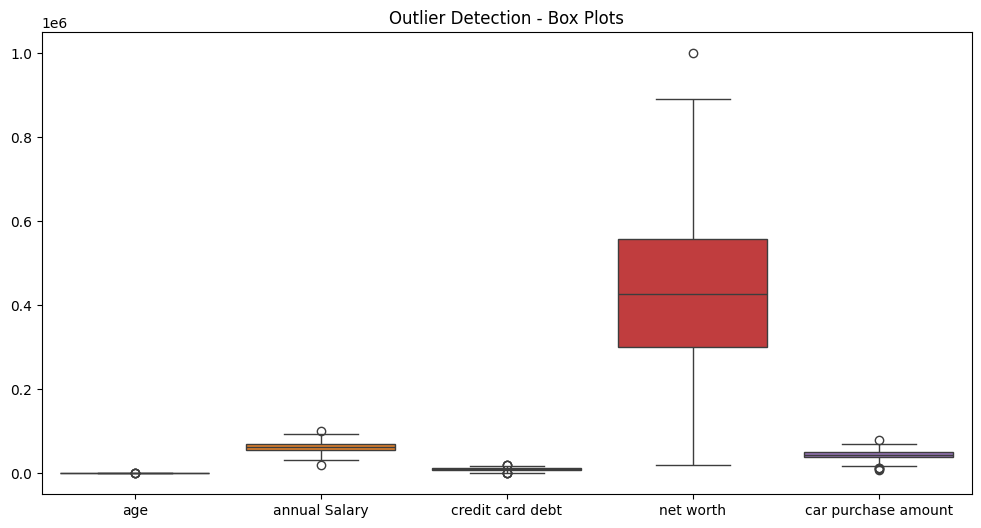

In [15]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']])
plt.title("Outlier Detection - Box Plots")
plt.show()

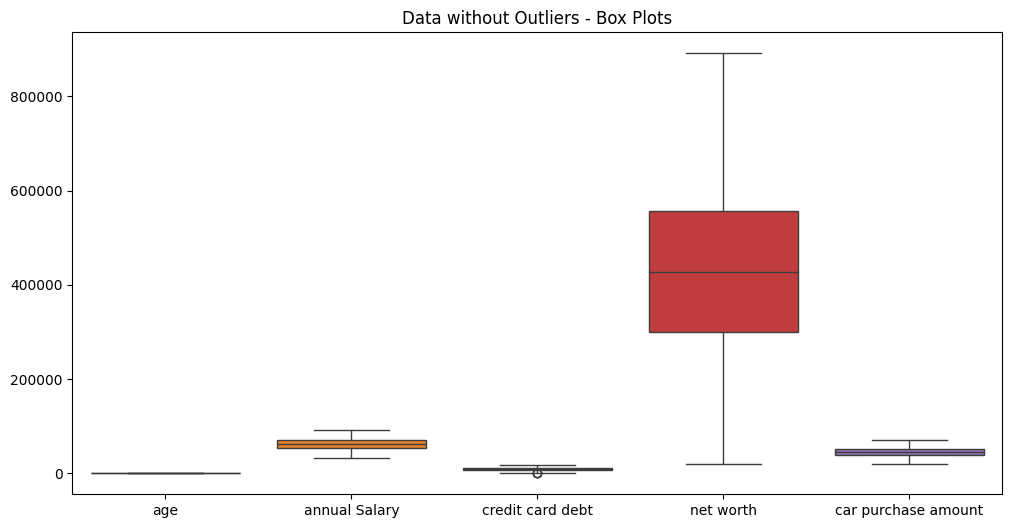

In [16]:
# Detect and handle outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

for col in numeric_columns:
    df = remove_outliers_iqr(df, col)


# Visualize data without outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']])
plt.title("Data without Outliers - Box Plots")
plt.show()

In [17]:
df = df.select_dtypes(include='number')

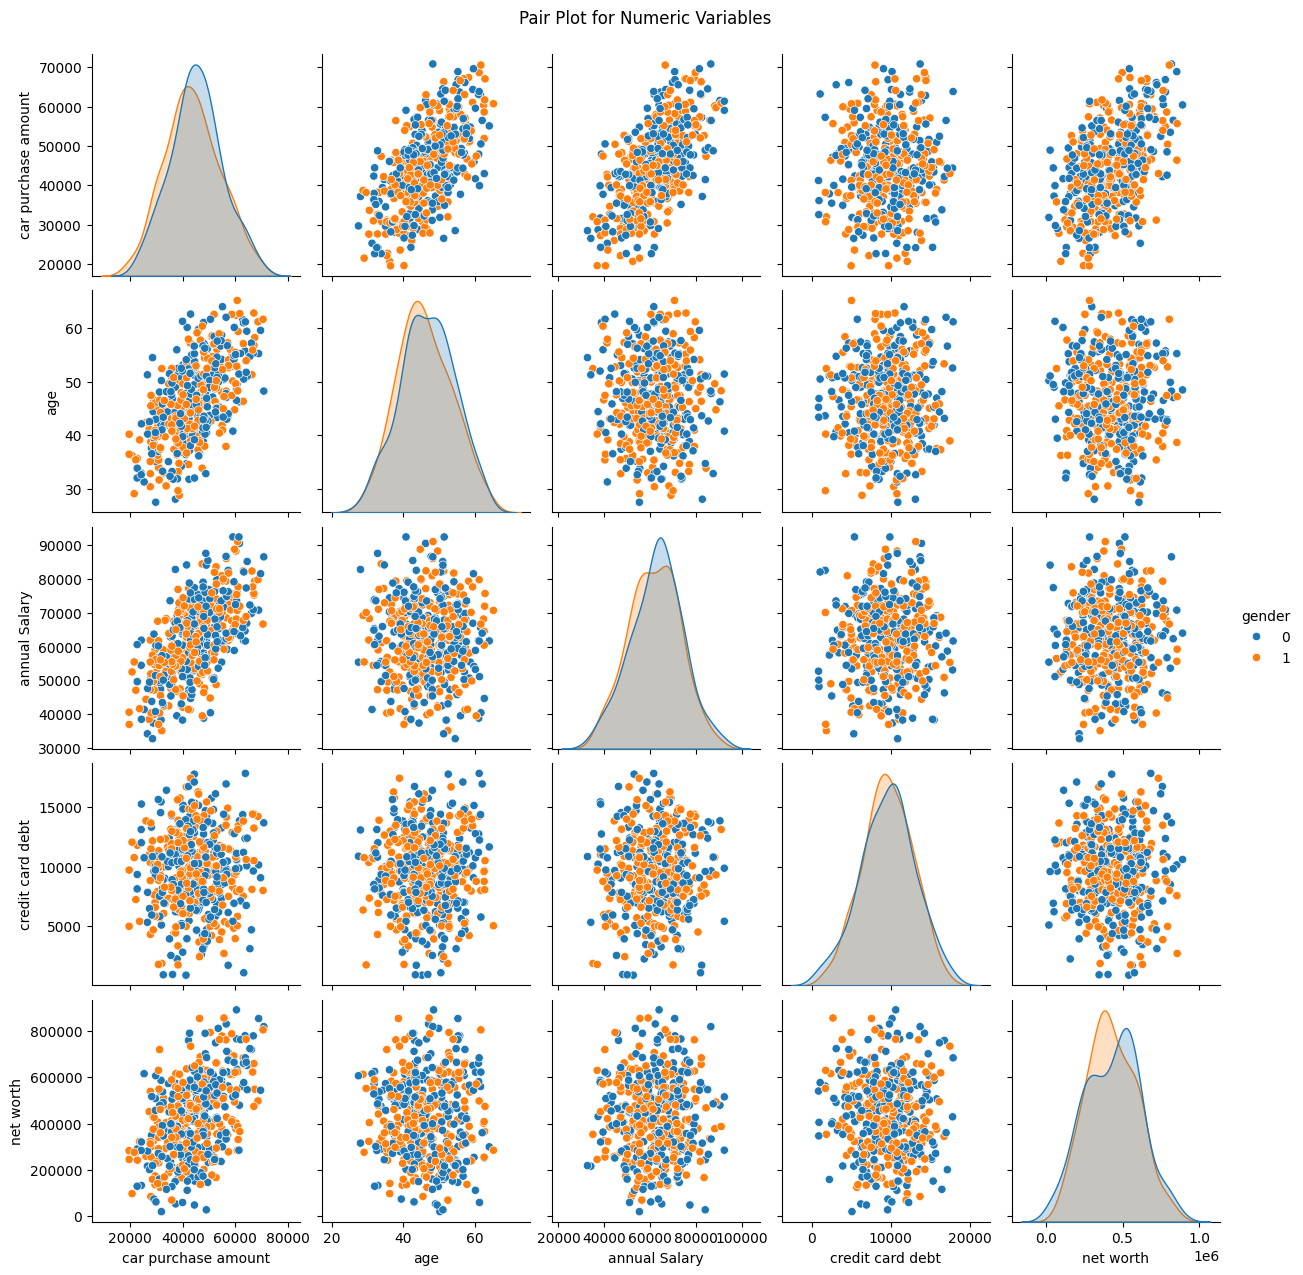

In [18]:
# Pair plot to visualize pairwise relationships between all numeric variables
sns.pairplot(df, vars=["car purchase amount", "age", "annual Salary", "credit card debt", "net worth"], hue="gender", diag_kind='kde')

plt.suptitle("Pair Plot for Numeric Variables", y=1.02)
plt.show()

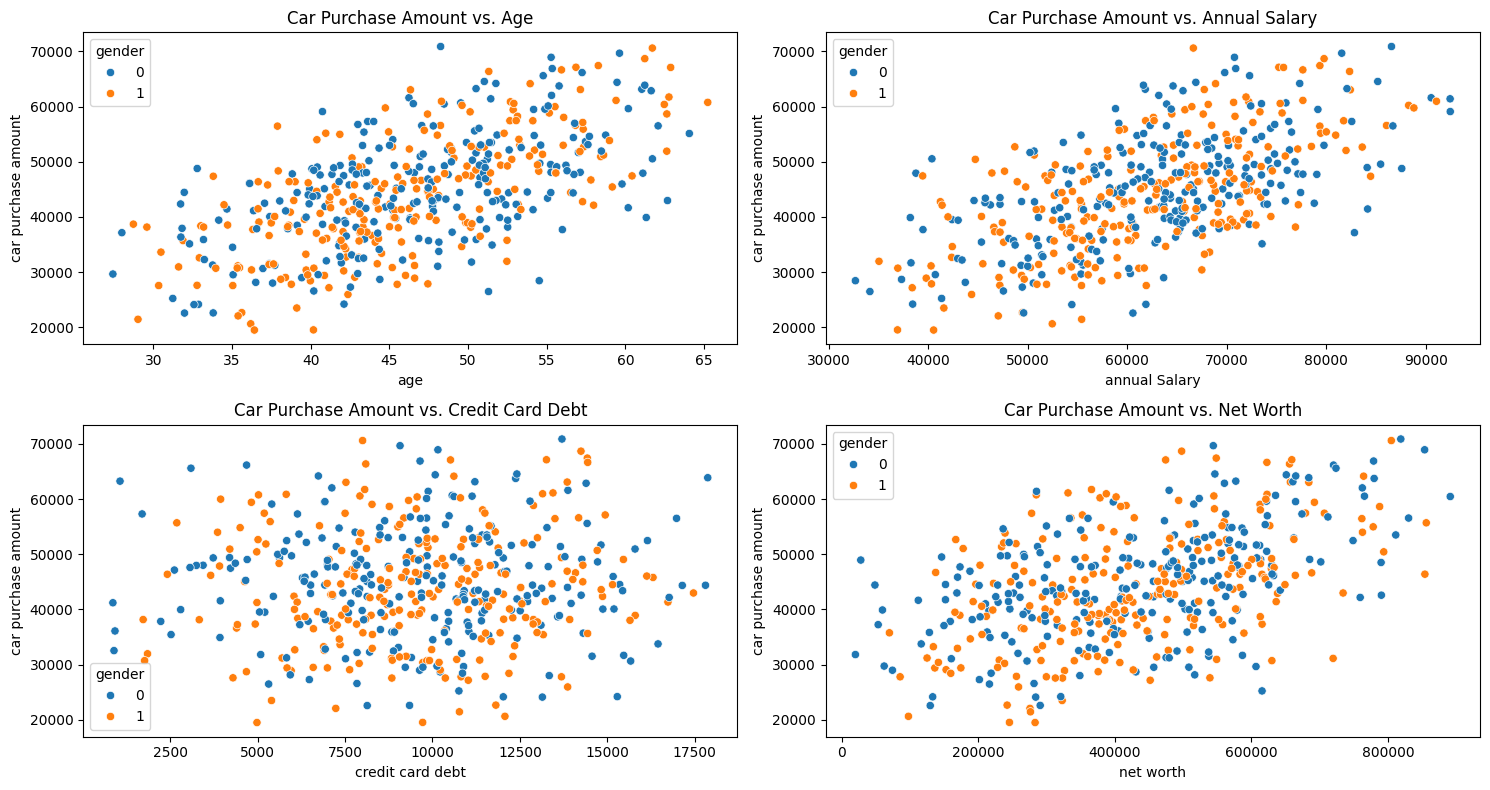

In [19]:
# Scatter plots for individual relationships between "Car Purchase Amount" and other numeric variables
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="age", y="car purchase amount", hue="gender")
plt.title("Car Purchase Amount vs. Age")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="annual Salary", y="car purchase amount", hue="gender")
plt.title("Car Purchase Amount vs. Annual Salary")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="credit card debt", y="car purchase amount", hue="gender")
plt.title("Car Purchase Amount vs. Credit Card Debt")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x="net worth", y="car purchase amount", hue="gender")
plt.title("Car Purchase Amount vs. Net Worth")

plt.tight_layout()
plt.show()

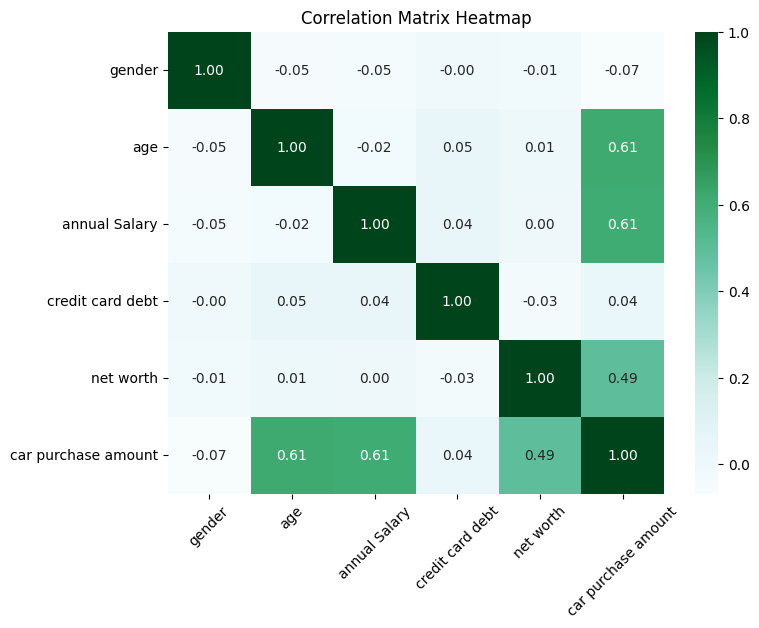

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap with the "BuGn" colormap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

## Define features (x) and target(y)

In [21]:
x=df.drop('car purchase amount',axis=1)
x.shape

(483, 5)

In [23]:
y=df['car purchase amount']
y=y.values.reshape(-1,1)
y.shape

(483, 1)

In [24]:
scalar=MinMaxScaler()
x=scalar.fit_transform(x)
y=scalar.fit_transform(y)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(386, 5)
(97, 5)
(386, 1)
(97, 1)


# Model Training

## Linear Regression Model

In [26]:
# Linear Regression Model
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

LinearRegression()

In [27]:
lr_train_score = lr_reg.score(x_train, y_train)
lr_test_score = lr_reg.score(x_test, y_test)
y_pred_lr = lr_reg.predict(x_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [28]:
print(f"Training Score: {lr_train_score}")
print(f"Test Score: {lr_test_score}")
print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R^2 Score: {r2_lr}")

Training Score: 0.9999999789068654
Test Score: 0.99999997914959
MAE: 2.300885545868003e-05
RMSE: 2.9426700114148312e-05
R^2 Score: 0.99999997914959


## SGD Regressor Model

In [29]:
sgd_model = SGDRegressor(max_iter=3000, learning_rate='adaptive', random_state=42)
sgd_model.fit(x_train, y_train)

SGDRegressor(learning_rate='adaptive', max_iter=3000, random_state=42)

In [30]:
sgd_train_score = sgd_model.score(x_train, y_train)
sgd_test_score = sgd_model.score(x_test, y_test)
y_pred_sgd = sgd_model.predict(x_test)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
r2_sgd = r2_score(y_test, y_pred_sgd)

In [31]:
print(f"Training Score: {sgd_train_score}")
print(f"Test Score: {sgd_test_score}")
print(f"MAE: {mae_sgd}")
print(f"RMSE: {rmse_sgd}")
print(f"R^2 Score: {r2_sgd}")

Training Score: 0.9136429162067177
Test Score: 0.909995337264242
MAE: 0.0493718343731022
RMSE: 0.06113877999385756
R^2 Score: 0.909995337264242


##  Neural Network Model

In [32]:
# Neural Network Model
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))  # INPUT LAYER and FIRST 
model.add(Dense(25, activation='relu'))     # HIDDEN LAYER
model.add(Dense(25, activation='relu'))     # HIDDEN LAYER
model.add(Dense(25, activation='relu'))     # HIDDEN LAYER
model.add(Dense(10, activation='relu'))     # HIDDEN LAYER
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2567 - val_loss: 0.1740
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1521 - val_loss: 0.0997
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0754 - val_loss: 0.0424
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0309 - val_loss: 0.0256
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - val_loss: 0.0283
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - val_loss: 0.0207
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - val_loss: 0.0217
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - val_loss: 0.0187
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - val_loss: 0.0174
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0147
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0127
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - val_loss: 0.0111


In [33]:
y_pred_nn = model.predict(x_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [34]:
print(f"MAE: {mae_nn}")
print(f"RMSE: {rmse_nn}")
print(f"R^2 Score: {r2_nn}")

MAE: 0.006141068915051058
RMSE: 0.0093755275434464
R^2 Score: 0.9978834774476968


In [47]:
new_sample = np.array([[1,32,82812,21609,138961]])

In [48]:
new_sample = new_sample.reshape(1, -1)

In [49]:
pred_lr = lr_reg.predict(new_sample).item()
pred_sgd = sgd_model.predict(new_sample).item()
pred_nn = model.predict(new_sample).item()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [50]:
# Model names
models = ['Linear Regression', 'SGD Regressor', 'Neural Network']

# MAE values
mae_values = [mae_lr, mae_sgd, mae_nn]

# RMSE values
rmse_values = [rmse_lr, rmse_sgd, rmse_nn]

# R^2 Score values
r2_values = [r2_lr, r2_sgd, r2_nn]

# Predicted values for each model
predicted_values = [y_pred_lr, y_pred_sgd, y_pred_nn]

#sample predicted values
pred_values=[pred_lr,pred_sgd,pred_nn]

In [51]:
results_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R² Score': r2_values,
    'Predicted Values':pred_values
})

# Display the DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+----+-------------------+-------------+-------------+------------+--------------------+
|    | Model             |         MAE |        RMSE |   R² Score |   Predicted Values |
+====+===================+=============+=============+============+====================+
|  0 | Linear Regression | 2.30089e-05 | 2.94267e-05 |   1        |           122568   |
+----+-------------------+-------------+-------------+------------+--------------------+
|  1 | SGD Regressor     | 0.0493718   | 0.0611388   |   0.909995 |            85554.4 |
+----+-------------------+-------------+-------------+------------+--------------------+
|  2 | Neural Network    | 0.00614107  | 0.00937553  |   0.997883 |            76985.9 |
+----+-------------------+-------------+-------------+------------+--------------------+
